<a href="https://colab.research.google.com/github/happycode-ch/pandas_colab/blob/main/3_Methods_and_Handeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Series: Part-2, Methods and Handeling


### Reading in Data With read_csv()

In [1]:
# https://andybeck.com/pandas-drinks

In [2]:
import pandas as pd

In [3]:
pd.read_csv('https://andybek.com/pandas-drinks') # dataframe from csv

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [4]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [6]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [7]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [8]:
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
# read_csv() method allways returns a dataframe / squeeze boolean, default=False

In [10]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True) # returns a Series rather than a df

<ipython-input-10-604601290aea>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True) # returns a Series rather than a df


In [11]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [12]:
type(alcohol)

pandas.core.series.Series

In [13]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country').squeeze('columns') # not depreciated, yet

In [14]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Series sizing with .size, .shape, and len()

In [15]:
alcohol.size

193

In [16]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [17]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [18]:
# alcohol.read_sql('SELECT int_column, date_column FROM test_data', conn) - SQL

In [19]:
alcohol.values.size == alcohol.index.size

True

In [20]:
alcohol.shape

(193,)

In [21]:
alcohol.size == alcohol.size

True

In [22]:
len(alcohol)

193

### Unique Values And Series Monotonicity

In [23]:
alcohol.is_unique

False

In [24]:
alcohol.head().is_unique

True

In [25]:
alcohol.nunique()

71

In [26]:
alcohol.nunique(dropna=False) # now includes NaN values

72

In [27]:
alcohol.is_monotonic_increasing

False

In [28]:
alcohol.is_monotonic_decreasing

False

In [29]:
pd.Series([1,2,3]).is_monotonic_increasing

True

In [30]:
pd.Series([3,2,1]).is_monotonic_decreasing

True

In [31]:
pd.Series([1,3,3,3,3,3,2]).is_monotonic_increasing

False

In [32]:
pd.Series([1,3,3,3,3,45,2114]).is_monotonic_increasing

True

### The count() method

In [33]:
alcohol.count() # method returns number of non-NA/null observations in the Series

162

In [34]:
alcohol.size # this property returns null's

193

In [35]:
alcohol.hasnans # property shows data has null values

True

### Accessing And Counting NA's

In [36]:
alcohol.count()

162

In [37]:
alcohol.size

193

In [38]:
alcohol.isnull() # returns series of booleans

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [39]:
alcohol[alcohol.isnull()].index # returns pandas object

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [40]:
list(alcohol[alcohol.isnull()].index) # list of strings, countries that have NaN's

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [41]:
len(list(alcohol[alcohol.isnull()].index)) # cumbersome way to do this, difficult to work with

31

In [42]:
alcohol.isnull().sum() # a more Pandorable way to achieve the results (list length), sum of the booleans(integers)

31

In [43]:
sum([True, False, True])

2

In [44]:
all = alcohol.size

In [45]:
nonulls = alcohol.count()

In [46]:
nulls = alcohol.isnull().sum()

In [47]:
all == nonulls + nulls

True

### BONUS: Boolans are litterally numbers in Python

In [48]:
True + 19

20

In [49]:
True + True - False + True * 3

5

In [50]:
# 5 / False  Produces Division Error

In [51]:
type(True)

bool

In [52]:
bool.__mro__

(bool, int, object)

### Skill Challenge

1. Isolate the non-nulls in the alcohol series and assign them to the variable *wine_servings*.

In [53]:
wine_servings = pd.Series(data=alcohol[alcohol.notnull()], index=alcohol[alcohol.notnull()].index)

In [54]:
wine_servings = alcohol.loc[alcohol.notna()]

2.  What is the total wine consumed by countries in wine_servings

In [55]:
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [56]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [57]:
wine_servings.sum()

8221.0

3. Bonus: Countries with less than 100 servings

In [58]:
wine_servings_lt_100 = wine_servings[wine_servings < 100]

In [59]:
wine_servings_lt_100.notna()

country
Albania              True
Algeria              True
Angola               True
Antigua & Barbuda    True
Armenia              True
                     ... 
Vanuatu              True
Venezuela            True
Vietnam              True
Zambia               True
Zimbabwe             True
Name: wine_servings, Length: 132, dtype: bool

In [60]:
wine_servings_lt_100 = wine_servings[wine_servings < 100].sum()

In [61]:
wine_servings_lt_100

2416.0

### Dropping And Filling NAs

In [62]:
alcohol.dropna() #creates and returns a non-modified version of the original series

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [63]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [64]:
# alcohol = alcohol.dropna() reassignment (one way)

In [65]:
# alcohol.dropna(inplace=True) inplace param (another way), will modify the original data

In [67]:
alcohol.fillna(100, inplace=False) # replaces NAs with something else

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Descriptive Statistics, allowing for characterization or descriptions of data

In [68]:
alcohol.sum() # NAs are automatically excluded from calculation, not distributed

8221.0

In [70]:
# average
alcohol.sum() / alcohol.count()

50.74691358024691

In [71]:
alcohol.mean()

50.74691358024691

In [72]:
# Median: middelmost element / number
alcohol.median()

11.5

In [73]:
alcohol.quantile(q=.5)

11.5

In [74]:
alcohol.quantile(.5)

11.5

The large gap between mean()=50.74.. and median()=11.5, lets us know that there are countries with large servings of alcohol that distort the data, right skewed, positive skew (more data /high value observations, than low)

Negative skew is the exact opposite.

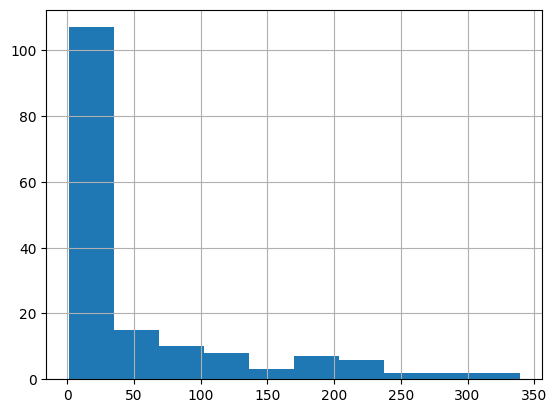

In [76]:
alcohol.hist(); # mean exceeds the median

In [79]:
# Inter Quantile Range or IQR: Statistics - Difference between the first and third quantiles
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [81]:
iqr # data is not distributed symetrically, almost five times the median

58.25

In [83]:
# min and max
alcohol.min()

1.0

In [84]:
alcohol.max()

339.0

In [86]:
# standard deviation
alcohol.std()

76.13491716376171

In [87]:
# variance
alcohol.var()

5796.5256115328575

In [88]:
alcohol.std()**2 == alcohol.var()

True

### The describe() Method

In [90]:
alcohol.describe() # returns a pandas series containing descritive satistics

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [91]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [93]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

### mode() and value_counts() Descriptive Statistics


In [94]:
# mode has the highest frequency, highest value

In [96]:
alcohol.mode() # most common occuring wine serving = 1

0    1.0
Name: wine_servings, dtype: float64

In [98]:
alcohol == 1 # trues have value of 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [99]:
alcohol[alcohol==1].size

28

In [104]:
# value_counts() returns a series containing unique values and their counts
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=False)

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [105]:
alcohol.value_counts().iloc[0]

28

In [106]:
alcohol.value_counts(sort=True, ascending=False, dropna=True, normalize=True) # realtive frequencies

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [107]:
28 / alcohol.count()

0.1728395061728395